Q1: Plot surface temperature Climatology for 
- May
- June
- July
- August
- September & for 
- mean of JJAS

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy as cp
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from pylab import *

In [53]:
may = xr.open_dataset('../monsoon/datasets/skt.may.nc')

In [54]:
# may = may.skt
clim_may = may.mean(dim='time')

Original shape - (94, 192)
New shape - (94, 193)


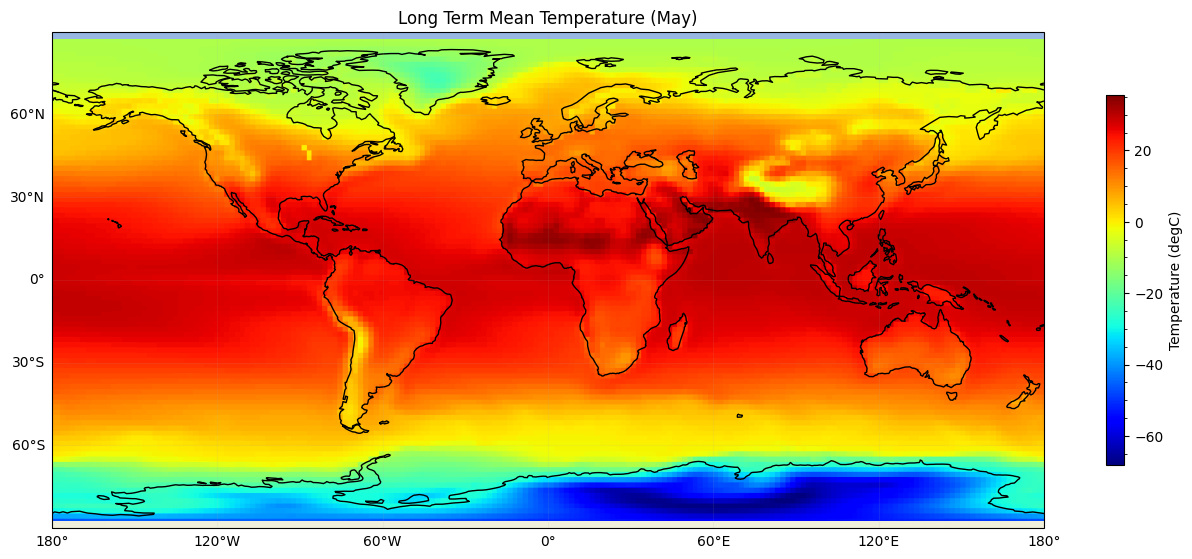

In [55]:

from cartopy.util import add_cyclic_point

clim_may_data = clim_may['skt']
lon = clim_may.coords['lon']

print("Original shape -", clim_may_data.shape)
lon_idx = clim_may_data.dims.index('lon')
wrap_clim_may, wrap_lon = add_cyclic_point(clim_may_data.values, coord=lon, axis=lon_idx)
print("New shape -", wrap_clim_may.shape)

# Plotting the data 

# lon = clim_may.lon
lat = clim_may.lat

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

mp = ax.imshow(wrap_clim_may-273.5,extent=(wrap_lon.min(),wrap_lon.max(),lat.min(),lat.max()),cmap='jet',origin='upper')
plt.title('Long Term Mean Temperature (May)')
# plt.legend(['Temp'])

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
# ax.add_feature(cfeature.BORDERS,edgecolor='blue')
# ax.add_feature(states_provinces, edgecolor='blue')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Temperature (degC)')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False




Original shape - (94, 192)
New shape - (94, 193)
Original shape - (94, 192)
New shape - (94, 193)
Original shape - (94, 192)
New shape - (94, 193)
Original shape - (94, 192)
New shape - (94, 193)
Original shape - (94, 192)
New shape - (94, 193)
Original shape - (94, 192)
New shape - (94, 193)


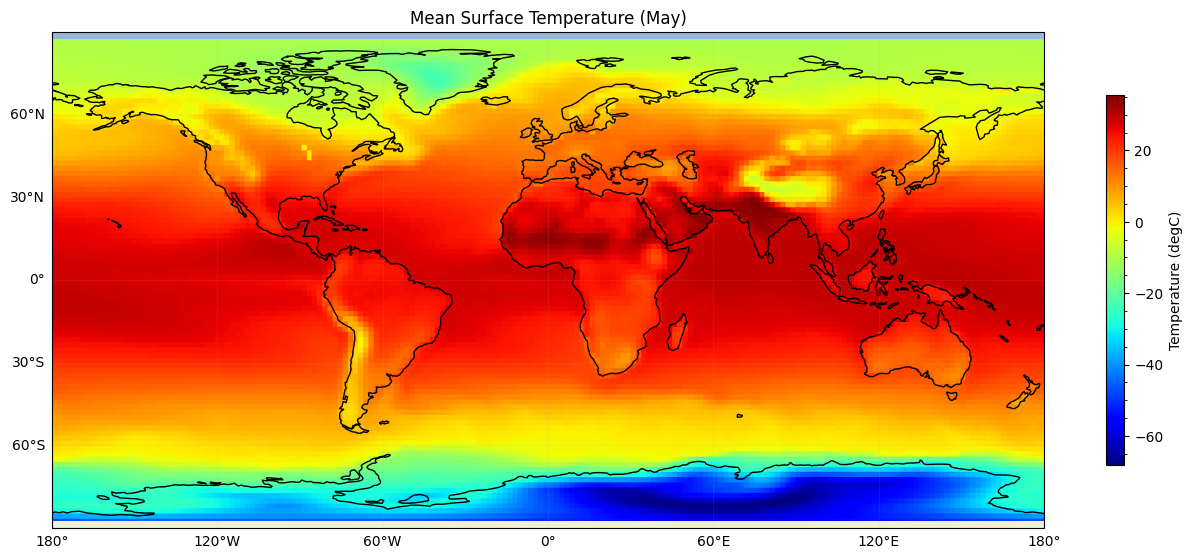

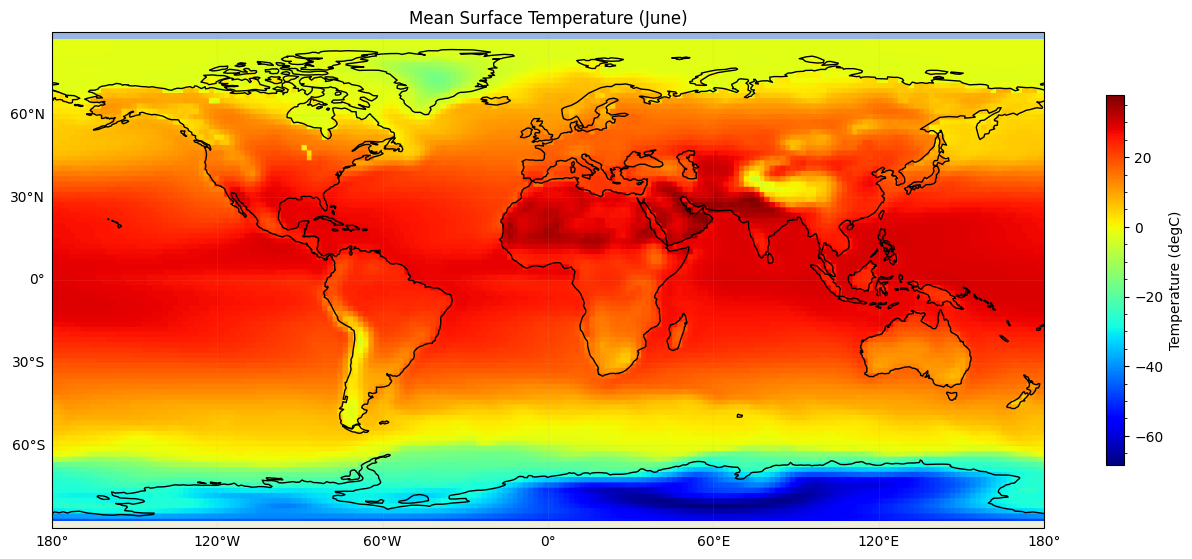

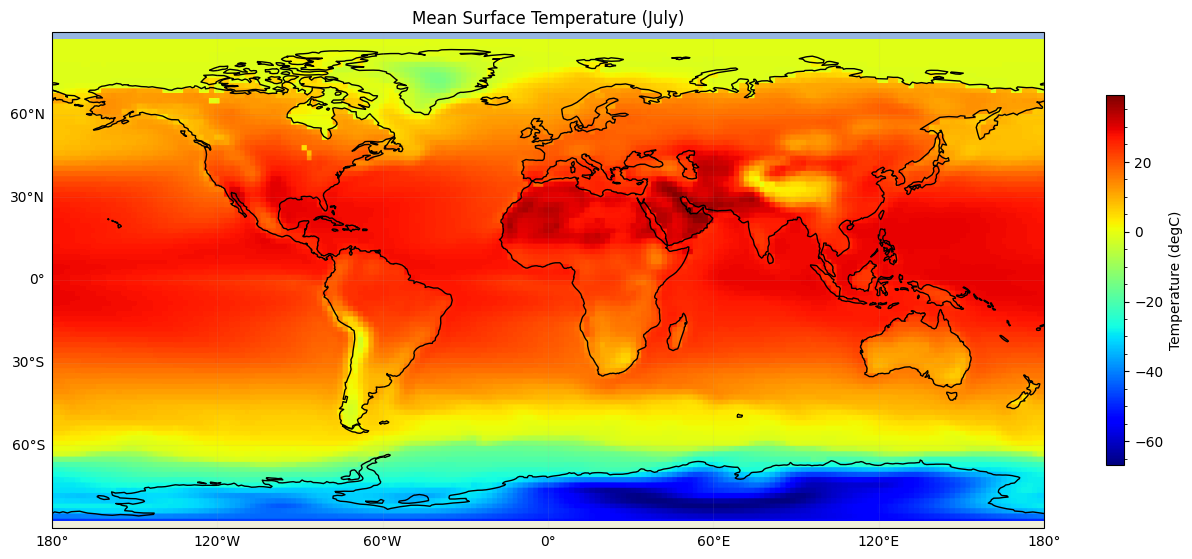

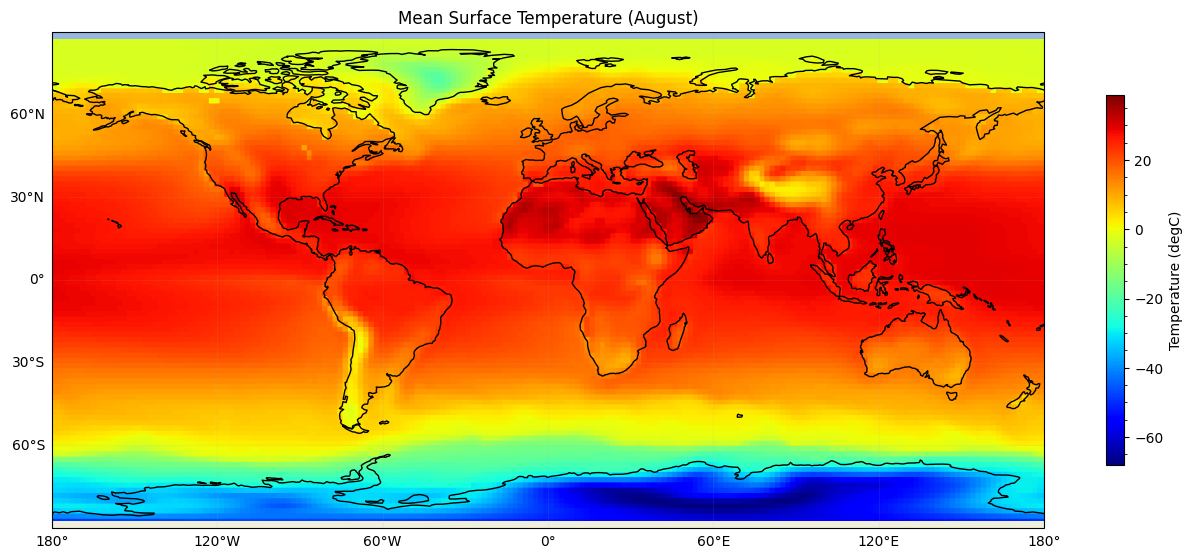

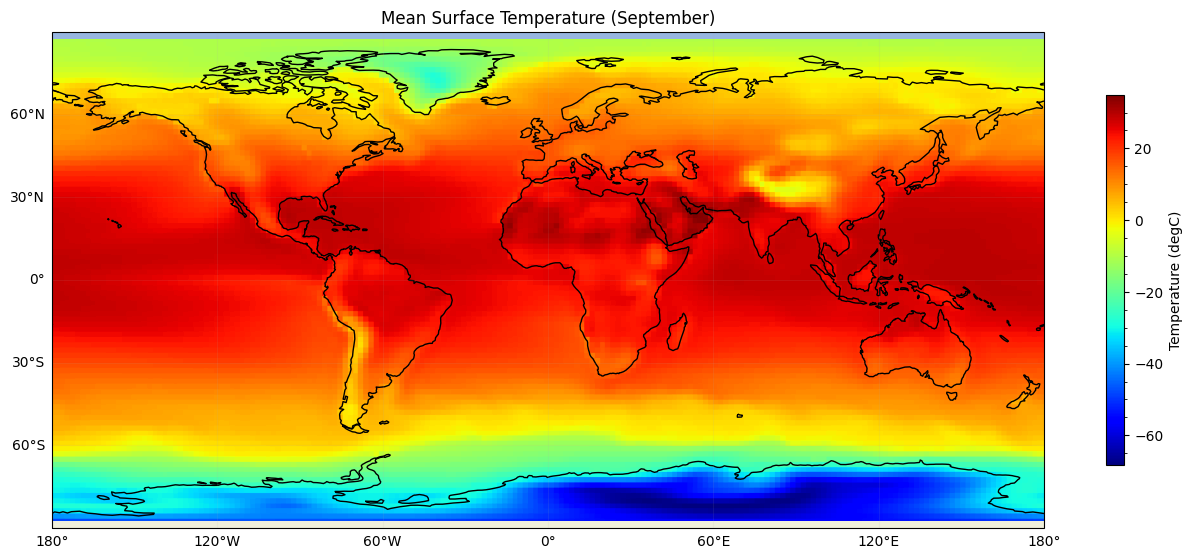

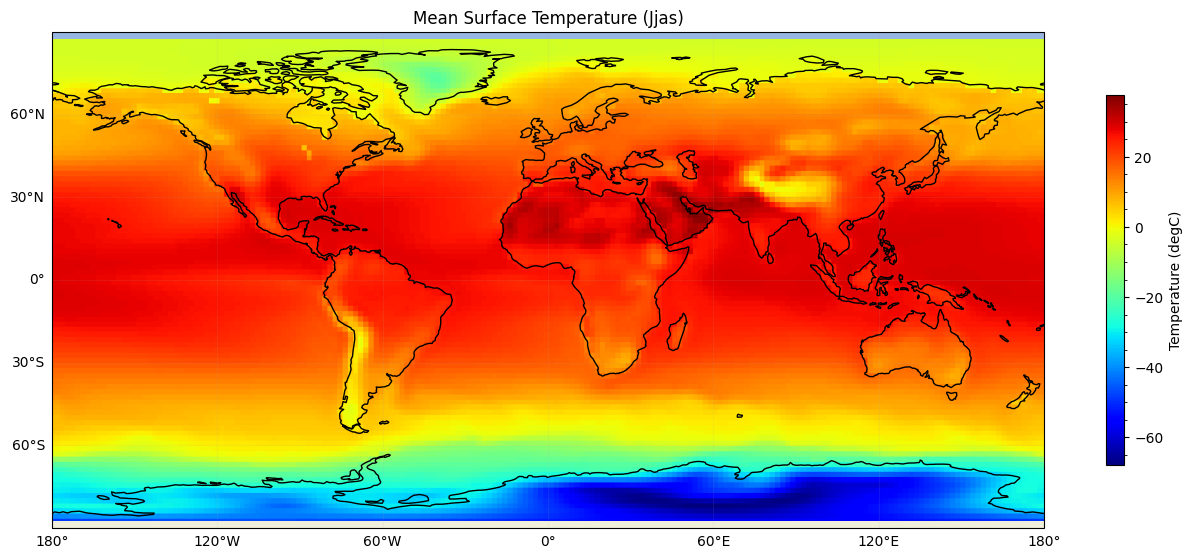

In [57]:
from cartopy.util import add_cyclic_point


months = ['may','june','july','august','september','jjas']
# lon = clim_may.lon
lat = clim_may.lat
# plotting all the clim_data graphs at once

for i in months:
    clim_data = xr.open_dataset('../monsoon/datasets/skt.'+i+'.nc')
    clim_data = clim_data.mean(dim='time')

    # adding the cyclic points to remove the missing values in the center of the plot
    data = clim_data['skt']
    lon = clim_data.coords['lon']

    print("Original shape -", data.shape)
    lon_idx = data.dims.index('lon')
    clim_wrap_data, wrap_lon = add_cyclic_point(data.values, coord=lon, axis=lon_idx)
    print("New shape -", clim_wrap_data.shape)

    # clim_data = clim_data.skt
    # clim_data = clim_data.mean(dim='time')
    fig = plt.figure(figsize=(16,16))
    ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
    mp = ax.imshow(clim_wrap_data-273.5,extent=(wrap_lon.min(),wrap_lon.max(),lat.min(),lat.max()),cmap='jet',origin='upper')
    plt.title('Mean Surface Temperature ('+i.capitalize()+')')
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.OCEAN)
    cbar = fig.colorbar(mp, shrink=0.3,label='Temperature (degC)')
    cbar.minorticks_on()
    gl = ax.gridlines(draw_labels=True,alpha=0.1)
    gl.top_labels = False
    gl.right_labels = False
    plt.savefig('../monsoon/figures/Surface Temperature ('+i+').png')

In [ ]:
# function to add cyclic points 

def add_cyclic(data, lon):
    """Add a cyclic point to a data array.
    Parameters
    ----------
    data : array-like
        An n-dimensional array of data to add a cyclic point to.
    lon : array-like
        An array which specifies the coordinate values for
        `data`'s longitude coordinate.
    Returns
    -------
    The data array with a cyclic point added.
    """
    cyclic_data, cyclic_lon = add_cyclic_point(data, coord=lon, axis=-1)
    return cyclic_data, cyclic_lon

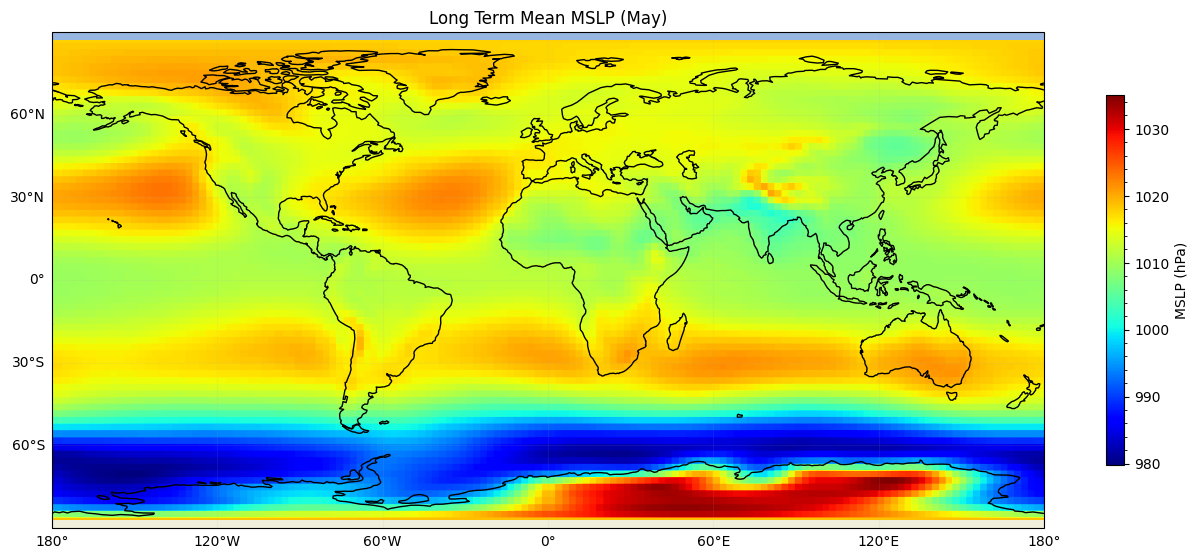

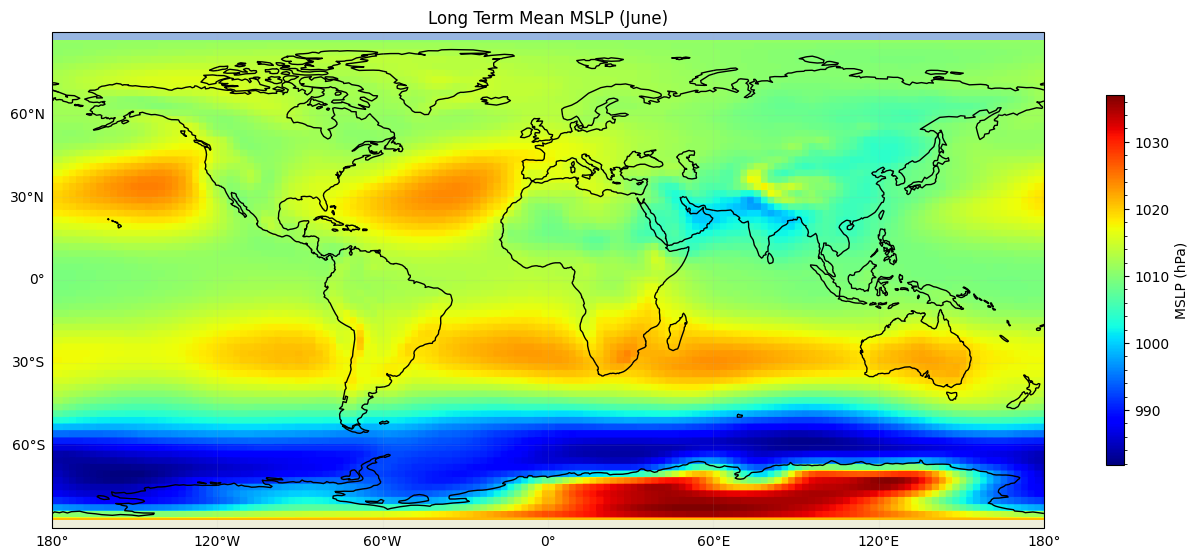

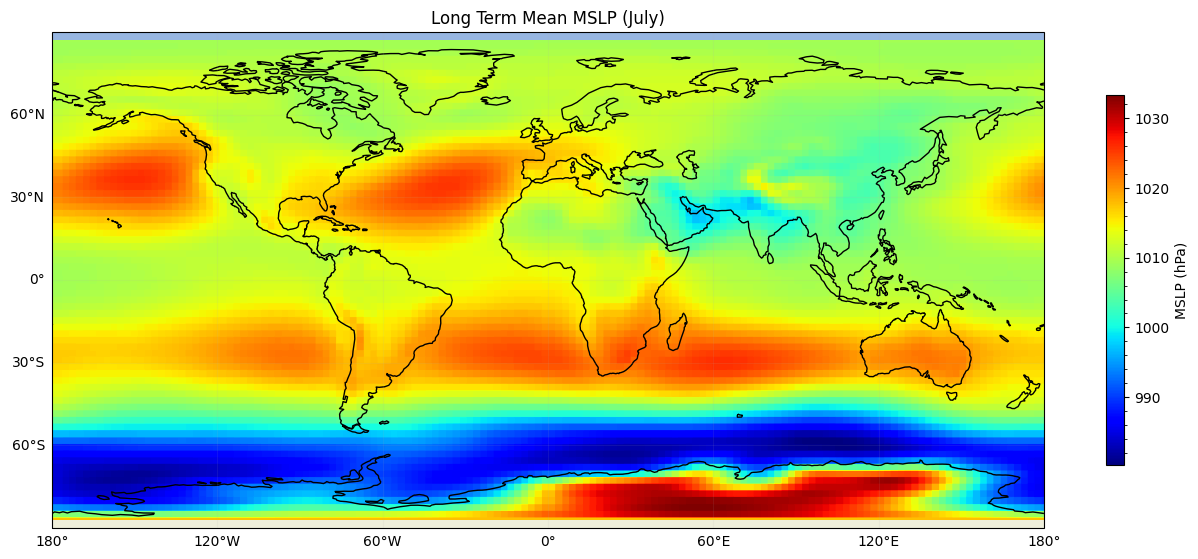

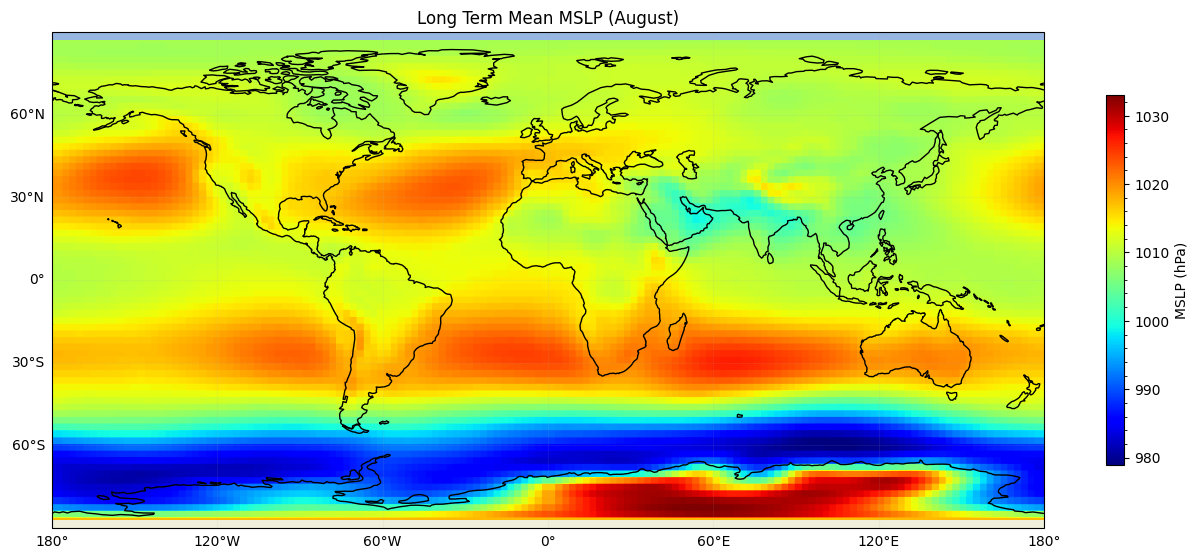

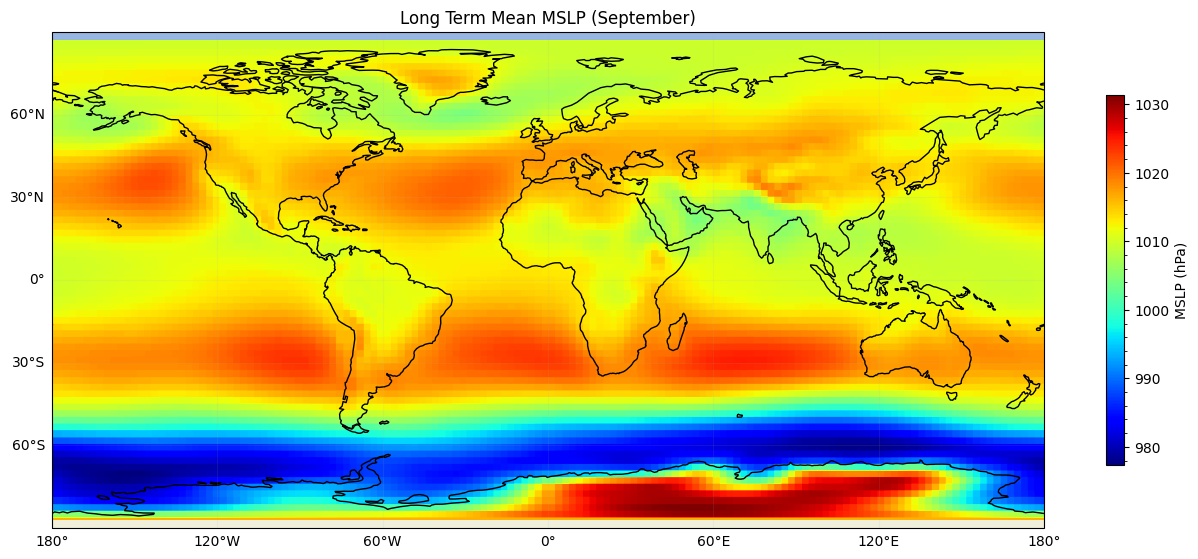

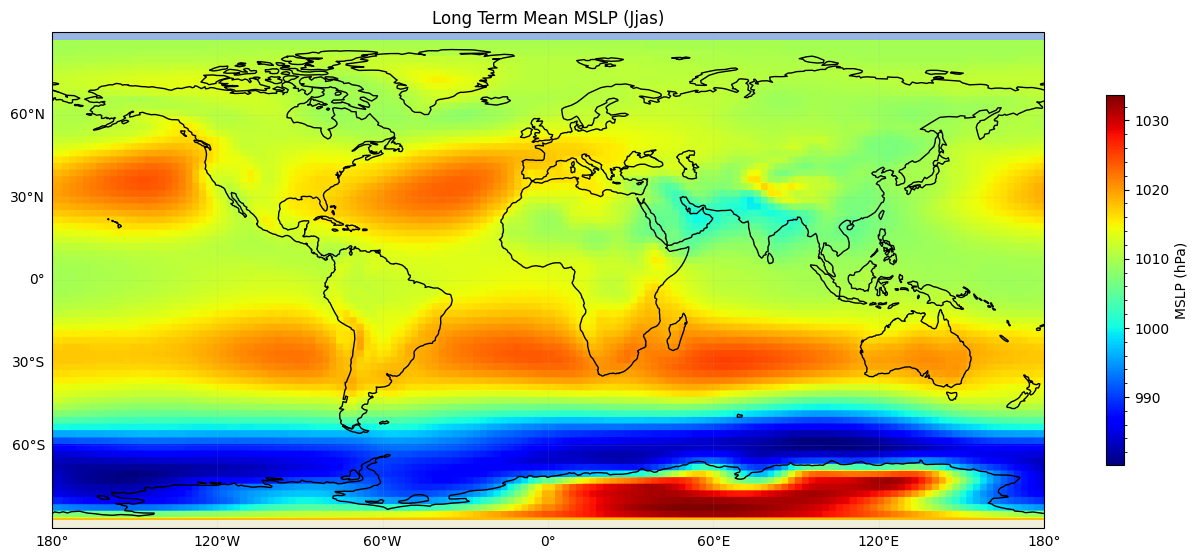

In [59]:
# Doing the same operation as above for MSLP dataset 

months = ['may','june','july','august','september','jjas']
# lon = clim_may.lon
lat = clim_may.lat
# plotting all the clim_data graphs at once

for i in months:
    clim_data = xr.open_dataset('../monsoon/datasets/mslp.'+i+'.nc')

    # adding the cyclic points to remove the missing values in the center of the plot using the above defined function
    clim_data = clim_data.mean(dim='time')

    cyclic_data, cyclic_lon = add_cyclic_point(clim_data['mslp'].values, coord=clim_data.coords['lon'], axis=-1)



    # clim_data = clim_data.mslp
    # clim_data = clim_data.mean(dim='time')
    fig = plt.figure(figsize=(16,16))
    ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
    mp = ax.imshow(cyclic_data/100,extent=(cyclic_lon.min(),cyclic_lon.max(),lat.min(),lat.max()),cmap='jet',origin='upper')
    plt.title('Long Term Mean MSLP ('+i.capitalize()+')')
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.OCEAN)
    cbar = fig.colorbar(mp, shrink=0.3,label='MSLP (hPa)')
    cbar.minorticks_on()
    gl = ax.gridlines(draw_labels=True,alpha=0.1)
    gl.top_labels = False
    gl.right_labels = False
    plt.savefig('../monsoon/figures/MSLP ('+i+').png')

In [19]:
# Plotting the time series of skin temp and MSLP for a particular location

clim_skt = xr.open_dataset('../monsoon/datasets/skt.ymonmean.nc')
clim_mslp = xr.open_dataset('../monsoon/datasets/mslp.ymonmean.nc')

In [21]:
clim_mslp = clim_mslp.mslp
clim_skt = clim_skt.skt

# Plotting the time series of skin temp and MSLP for a particular location

clim_skt_land = clim_skt.sel(lat=20,lon=80,method='nearest')
clim_mslp_land = clim_mslp.sel(lat=20,lon=80,method='nearest')

clim_skt_ocean = clim_skt.sel(lat=-20,lon=80,method='nearest')
clim_mslp_ocean = clim_mslp.sel(lat=-20,lon=80,method='nearest')

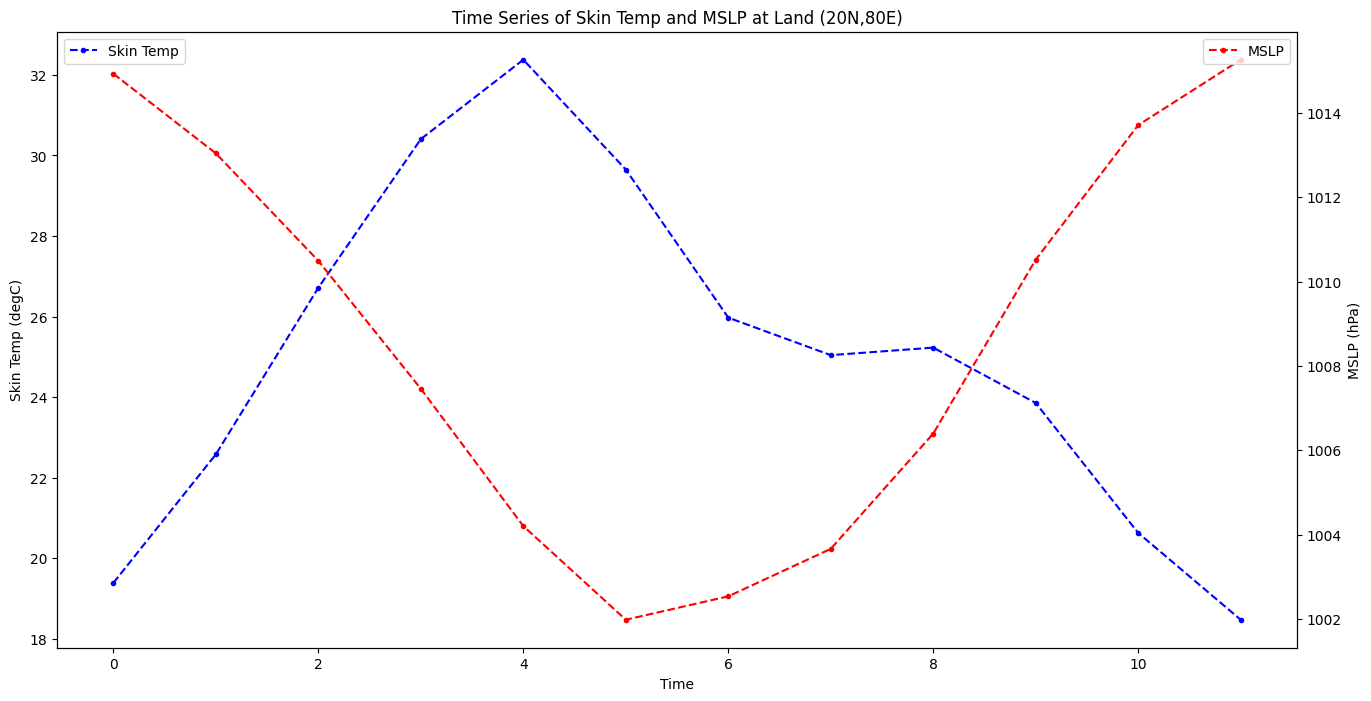

In [25]:
# plotting double y-axis plot with mslp on one side and skin temp on the other

fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()
ax1.plot(clim_skt_land-273.5,'b.--',label='Skin Temp')
ax2.plot(clim_mslp_land/100,'r.--',label='MSLP')
ax1.set_xlabel('Time')
ax1.set_ylabel('Skin Temp (degC)')
ax2.set_ylabel('MSLP (hPa)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Time Series of Skin Temp and MSLP at Land (20N,80E)')
plt.savefig('../monsoon/figures/Time Series of Skin Temp and MSLP at Land (20N,80E).png')


# adding a trendline to both the curves and plotting fitting function alongwith the difference of mslp and skin temperature

# fitting a linear function to the data



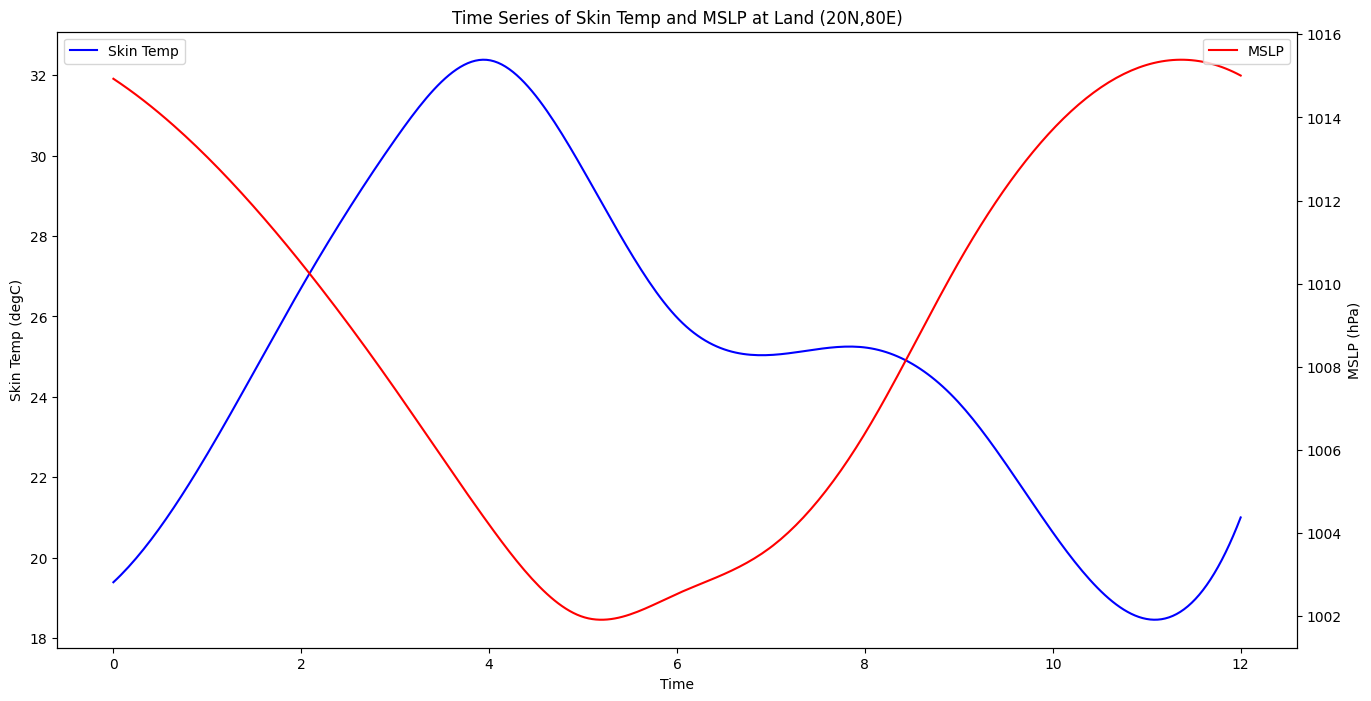

In [28]:
import numpy as np
from scipy.interpolate import make_interp_spline

# Plotting the time series of skin temp and MSLP for a particular location

clim_skt = xr.open_dataset('../monsoon/datasets/skt.ymonmean.nc')
clim_mslp = xr.open_dataset('../monsoon/datasets/mslp.ymonmean.nc')

clim_mslp = clim_mslp.mslp
clim_skt = clim_skt.skt

# Plotting the time series of skin temp and MSLP for a particular location

clim_skt_land = clim_skt.sel(lat=20,lon=80,method='nearest')
clim_mslp_land = clim_mslp.sel(lat=20,lon=80,method='nearest')

clim_skt_ocean = clim_skt.sel(lat=-20,lon=80,method='nearest')
clim_mslp_ocean = clim_mslp.sel(lat=-20,lon=80,method='nearest')

# create a smoother set of x values
xnew = np.linspace(0, len(clim_skt_land), 300)

# interpolate the skin temperature and MSLP data using a spline function
skt_spline = make_interp_spline(range(len(clim_skt_land)), clim_skt_land-273.5)
mslp_spline = make_interp_spline(range(len(clim_mslp_land)), clim_mslp_land/100)

# calculate the interpolated values using the new set of x values
skt_smooth = skt_spline(xnew)
mslp_smooth = mslp_spline(xnew)

# plot the smoothed curves
fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()
ax1.plot(xnew, skt_smooth, 'b-', label='Skin Temp')
ax2.plot(xnew, mslp_smooth, 'r-', label='MSLP')
ax1.set_xlabel('Time')
ax1.set_ylabel('Skin Temp (degC)')
ax2.set_ylabel('MSLP (hPa)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Time Series of Skin Temp and MSLP at Land (20N,80E)')
plt.savefig('../monsoon/figures/Time Series of Skin Temp and MSLP at Land (20N,80E).png')


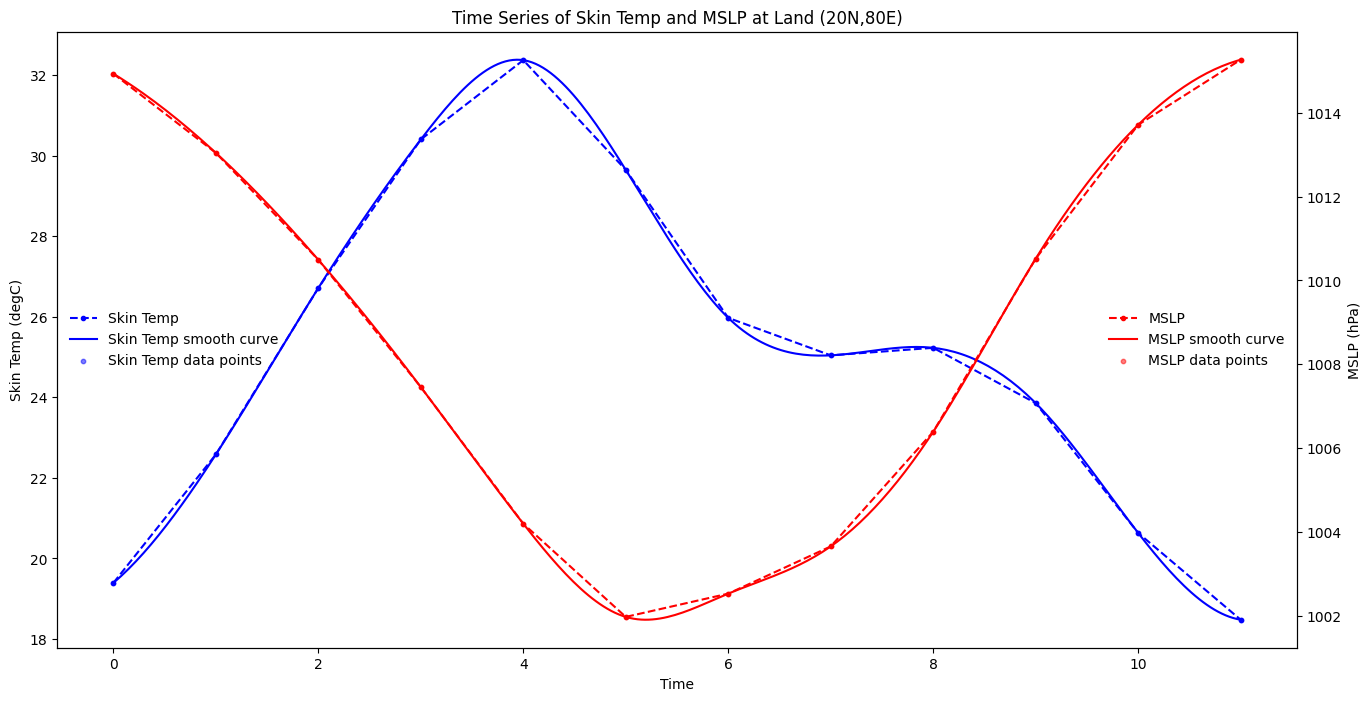

In [37]:
# Importing required libraries
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

# Plotting the time series of skin temp and MSLP for a particular location

clim_skt = xr.open_dataset('../monsoon/datasets/skt.ymonmean.nc')
clim_mslp = xr.open_dataset('../monsoon/datasets/mslp.ymonmean.nc')

clim_mslp = clim_mslp.mslp
clim_skt = clim_skt.skt

# Plotting the time series of skin temp and MSLP for a particular location

clim_skt_land = clim_skt.sel(lat=20,lon=80,method='nearest')
clim_mslp_land = clim_mslp.sel(lat=20,lon=80,method='nearest')

clim_skt_ocean = clim_skt.sel(lat=-20,lon=80,method='nearest')
clim_mslp_ocean = clim_mslp.sel(lat=-20,lon=80,method='nearest')


# plotting double y-axis plot with mslp on one side and skin temp on the other

fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()
ax1.plot(clim_skt_land-273.5,'b.--',label='Skin Temp')
ax2.plot(clim_mslp_land/100,'r.--',label='MSLP')

# # plotting the difference of mslp and skin temp
# plt.plot(clim_skt_land+273.5-clim_mslp_land/100 ,'g.--',label='MSLP - Skin Temp')

ax1.set_xlabel('Time')
ax1.set_ylabel('Skin Temp (degC)')
ax2.set_ylabel('MSLP (hPa)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adding smooth curves to the plot

# Define x and y values for skin temp
x1 = np.arange(len(clim_skt_land.time))
y1 = clim_skt_land.values - 273.5

# Define x and y values for MSLP
x2 = np.arange(len(clim_mslp_land.time))
y2 = clim_mslp_land.values / 100

# Smooth curves for skin temp and MSLP
s1 = make_interp_spline(x1, y1, k=3)
s2 = make_interp_spline(x2, y2, k=3)

# Plot the smooth curves
x1_new = np.linspace(x1.min(), x1.max(), 300)
x2_new = np.linspace(x2.min(), x2.max(), 300)

ax1.plot(x1_new, s1(x1_new), 'b-', label='Skin Temp smooth curve')
ax2.plot(x2_new, s2(x2_new), 'r-', label='MSLP smooth curve')

# Add actual data points to the plot
ax1.scatter(x1, y1, s=10, alpha=0.5, color='b', label='Skin Temp data points')
ax2.scatter(x2, y2, s=10, alpha=0.5, color='r', label='MSLP data points')

ax1.legend(loc='center left', frameon=False)
ax2.legend(loc='center right', frameon=False)
plt.title('Time Series of Skin Temp and MSLP at Land (20N,80E)')
plt.savefig('../monsoon/figures/Time Series of Skin Temp and MSLP at Land (20N,80E).png')
plt.show()


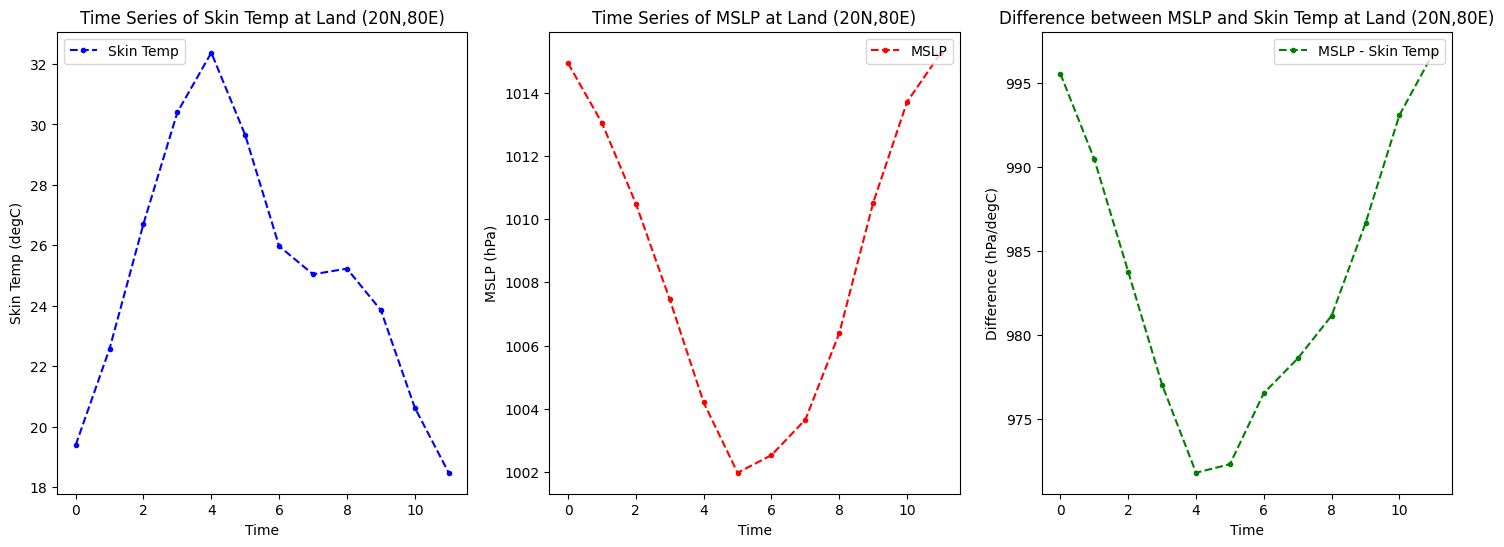

In [34]:
# Plotting the time series of skin temp and MSLP for a particular location

clim_skt = xr.open_dataset('../monsoon/datasets/skt.ymonmean.nc')
clim_mslp = xr.open_dataset('../monsoon/datasets/mslp.ymonmean.nc')

clim_mslp = clim_mslp.mslp
clim_skt = clim_skt.skt

# Plotting the time series of skin temp and MSLP for a particular location

clim_skt_land = clim_skt.sel(lat=20,lon=80,method='nearest')
clim_mslp_land = clim_mslp.sel(lat=20,lon=80,method='nearest')

clim_skt_ocean = clim_skt.sel(lat=-20,lon=80,method='nearest')
clim_mslp_ocean = clim_mslp.sel(lat=-20,lon=80,method='nearest')


# plotting double y-axis plot with mslp on one side and skin temp on the other

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,6))

# Plotting skin temperature time series
ax1.plot(clim_skt_land-273.5,'b.--',label='Skin Temp')
ax1.set_xlabel('Time')
ax1.set_ylabel('Skin Temp (degC)')
ax1.legend(loc='upper left')
ax1.set_title('Time Series of Skin Temp at Land (20N,80E)')

# Plotting MSLP time series
ax2.plot(clim_mslp_land/100,'r.--',label='MSLP')
ax2.set_xlabel('Time')
ax2.set_ylabel('MSLP (hPa)')
ax2.legend(loc='upper right')
ax2.set_title('Time Series of MSLP at Land (20N,80E)')

# Plotting difference between MSLP and skin temperature
diff = (clim_mslp_land/100) - (clim_skt_land-273.5)
ax3.plot(diff,'g.--',label='MSLP - Skin Temp')
ax3.set_xlabel('Time')
ax3.set_ylabel('Difference (hPa/degC)')
ax3.legend(loc='upper right')
ax3.set_title('Difference between MSLP and Skin Temp at Land (20N,80E)')

plt.savefig('../monsoon/figures/Time Series of Skin Temp, MSLP and Difference at Land (20N,80E).png')


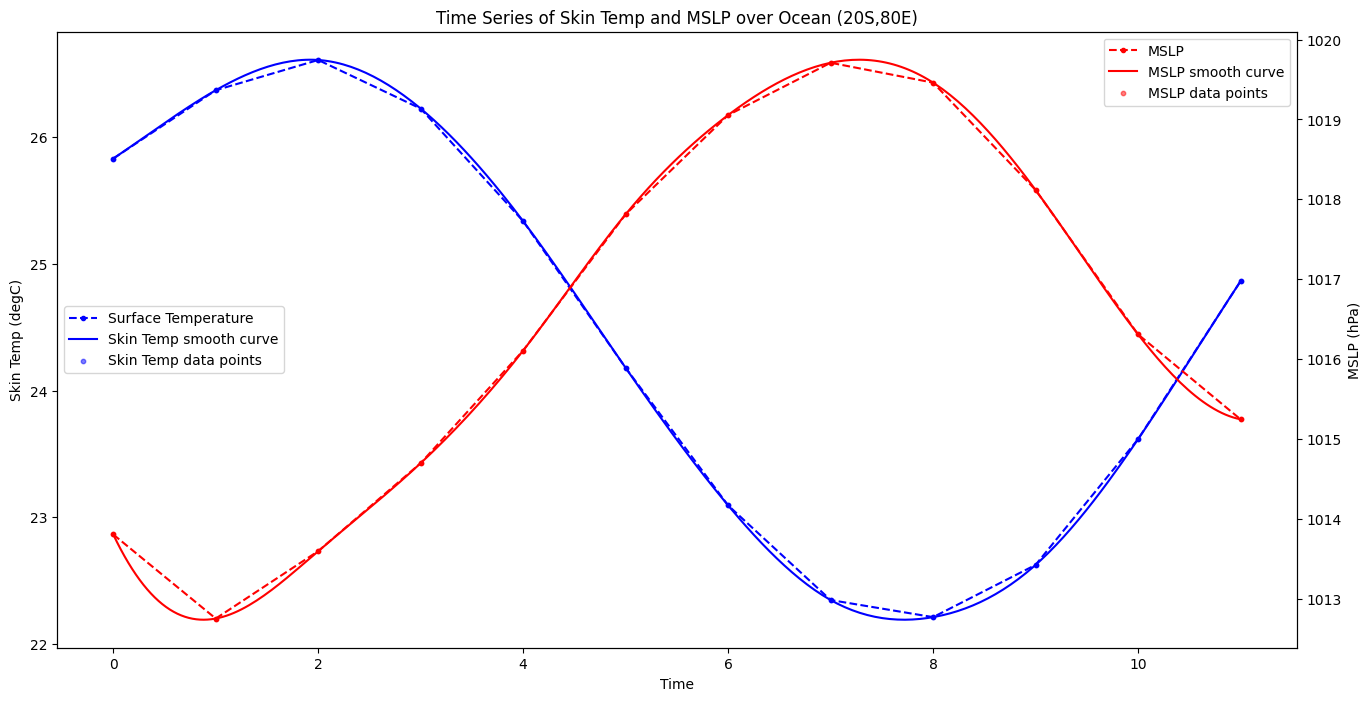

In [41]:
# Importing required libraries
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

# Plotting the time series of skin temp and MSLP for a particular location

clim_skt = xr.open_dataset('../monsoon/datasets/skt.ymonmean.nc')
clim_mslp = xr.open_dataset('../monsoon/datasets/mslp.ymonmean.nc')

clim_mslp = clim_mslp.mslp
clim_skt = clim_skt.skt

# Plotting the time series of skin temp and MSLP for a particular location

clim_skt_land = clim_skt.sel(lat=20,lon=80,method='nearest')
clim_mslp_land = clim_mslp.sel(lat=20,lon=80,method='nearest')

clim_skt_ocean = clim_skt.sel(lat=-20,lon=80,method='nearest')
clim_mslp_ocean = clim_mslp.sel(lat=-20,lon=80,method='nearest')


# plotting double y-axis plot with mslp on one side and skin temp on the other

fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()
ax1.plot(clim_skt_ocean-273.5,'b.--',label='Surface Temperature')
ax2.plot(clim_mslp_ocean/100,'r.--',label='MSLP')


ax1.set_xlabel('Time')
ax1.set_ylabel('Skin Temp (degC)')
ax2.set_ylabel('MSLP (hPa)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adding smooth curves to the plot

# Define x and y values for skin temp
x1 = np.arange(len(clim_skt_ocean.time))
y1 = clim_skt_ocean.values - 273.5

# Define x and y values for MSLP
x2 = np.arange(len(clim_mslp_ocean.time))
y2 = clim_mslp_ocean.values / 100

# Smooth curves for skin temp and MSLP
s1 = make_interp_spline(x1, y1, k=3)
s2 = make_interp_spline(x2, y2, k=3)

# Plot the smooth curves
x1_new = np.linspace(x1.min(), x1.max(), 300)
x2_new = np.linspace(x2.min(), x2.max(), 300)

ax1.plot(x1_new, s1(x1_new), 'b-', label='Skin Temp smooth curve')
ax2.plot(x2_new, s2(x2_new), 'r-', label='MSLP smooth curve')

# Add actual data points to the plot
ax1.scatter(x1, y1, s=10, alpha=0.5, color='b', label='Skin Temp data points')
ax2.scatter(x2, y2, s=10, alpha=0.5, color='r', label='MSLP data points')

ax1.legend(loc='center left', frameon=True)
ax2.legend(loc='upper right', frameon=True)
plt.title('Time Series of Skin Temp and MSLP over Ocean (20S,80E)')
plt.savefig('../monsoon/figures/Time Series of Skin Temp and MSLP over Ocean (20S,80E).png')
plt.show()


Air Temperature at 
- 1000hPa 
- 900hPa
- 850hPa

for may, june and july

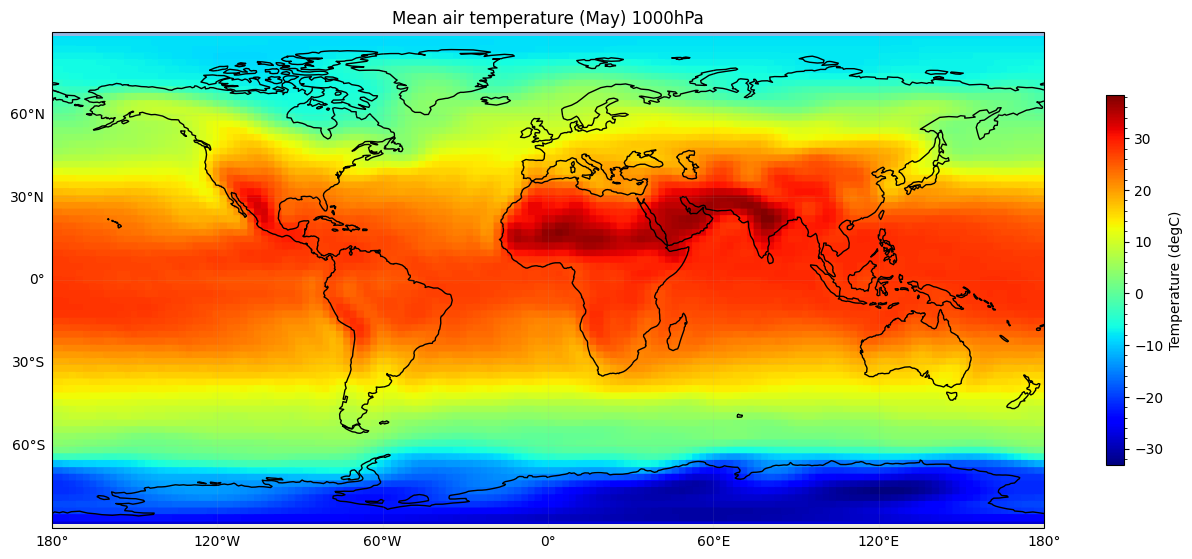

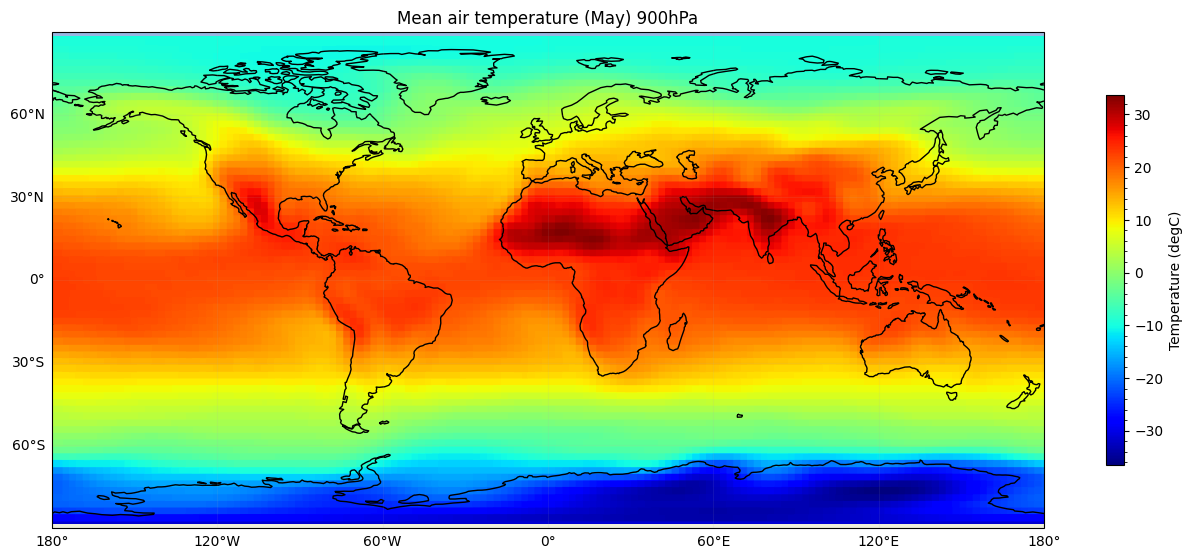

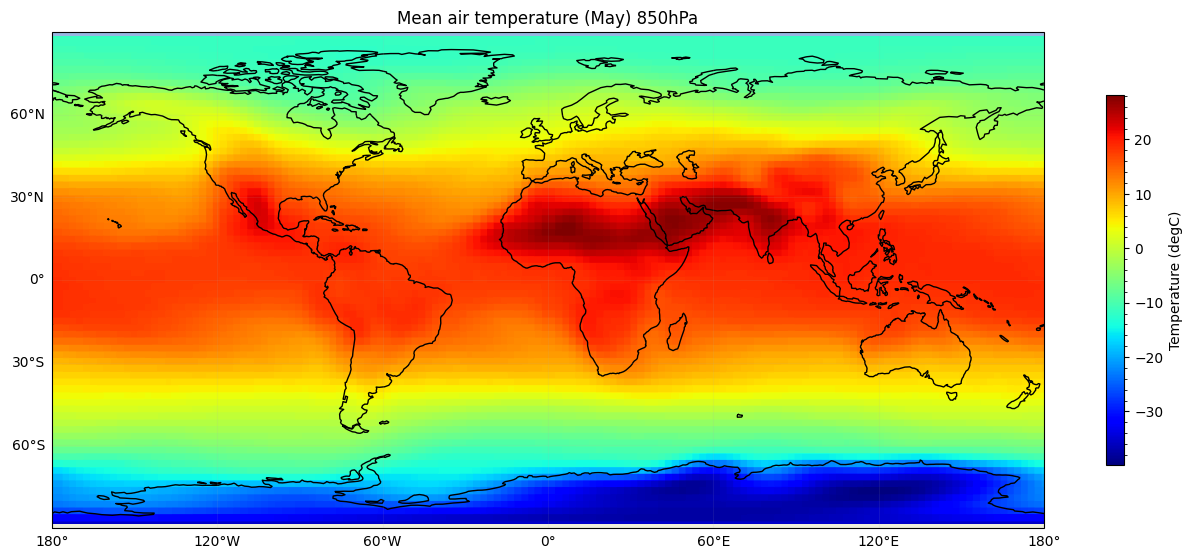

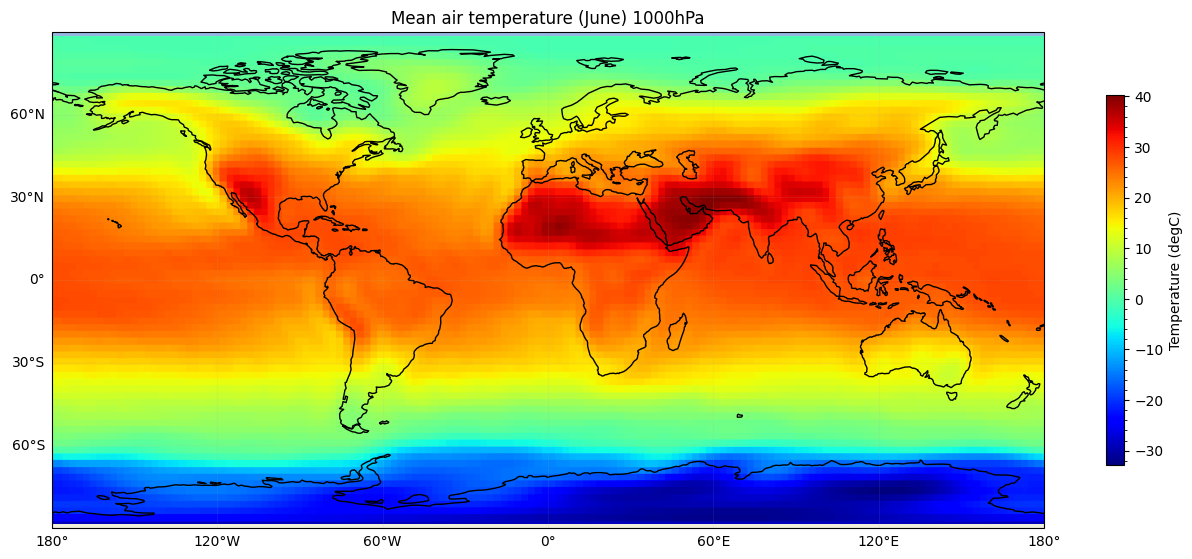

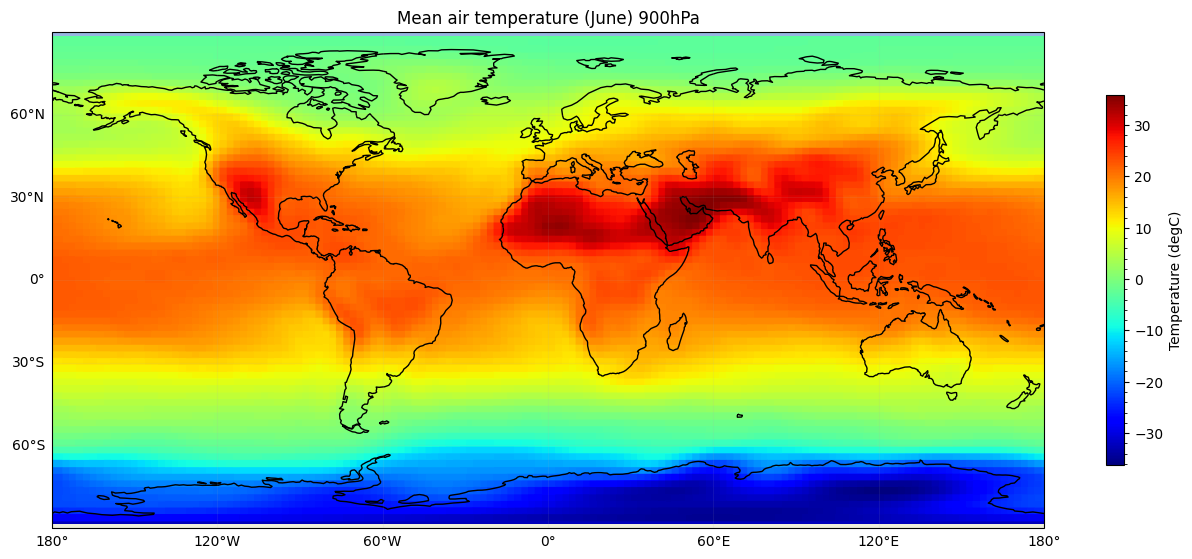

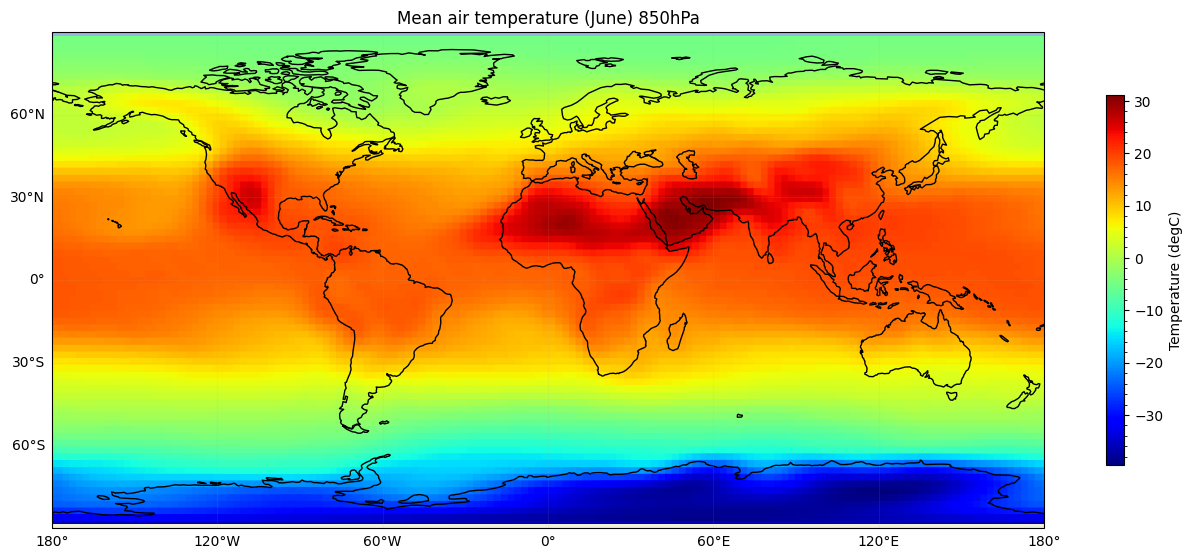

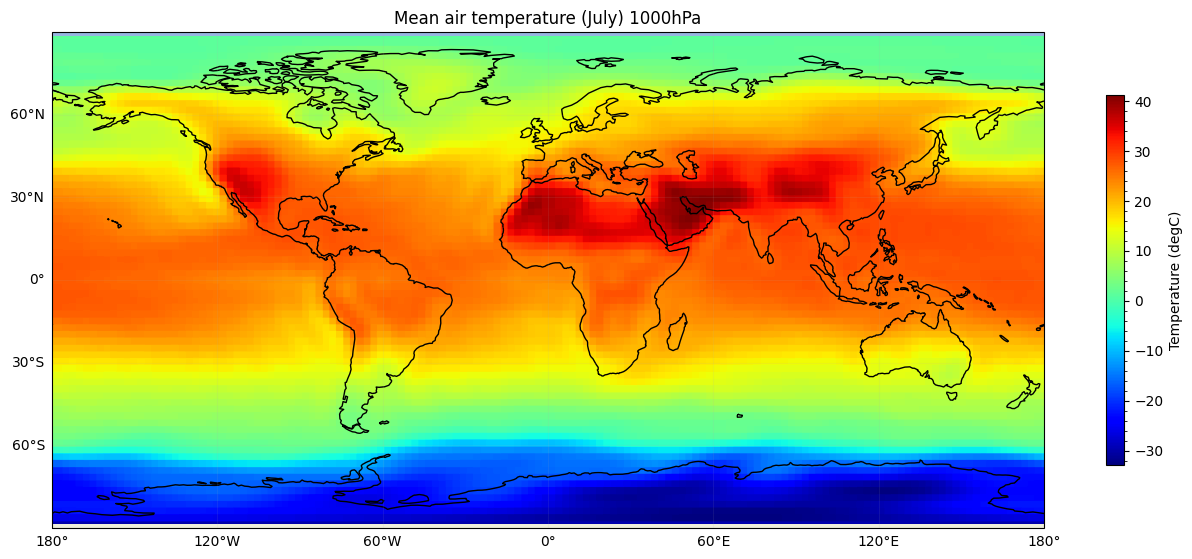

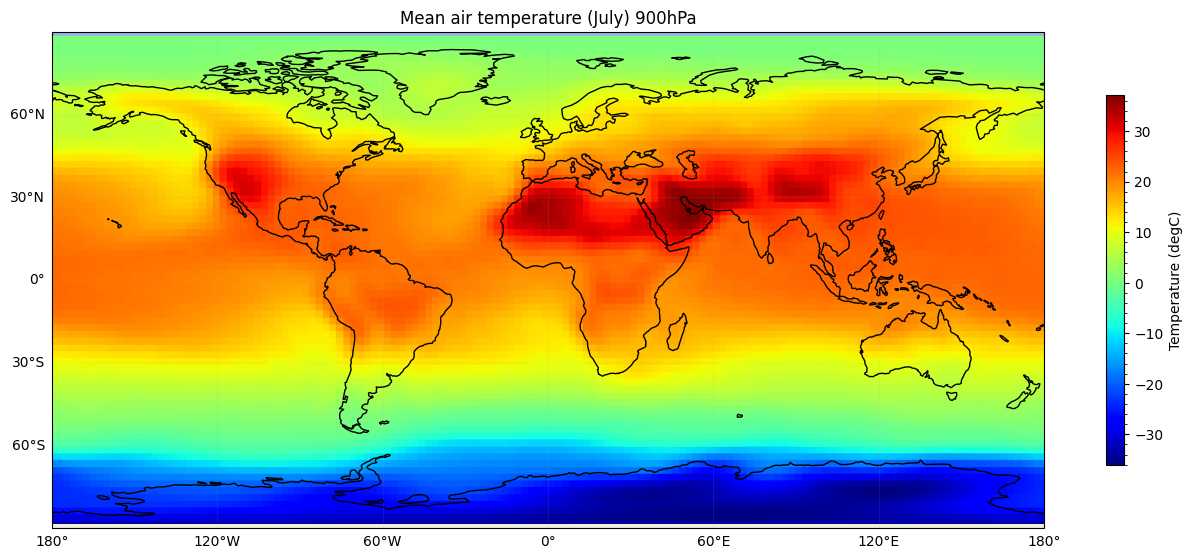

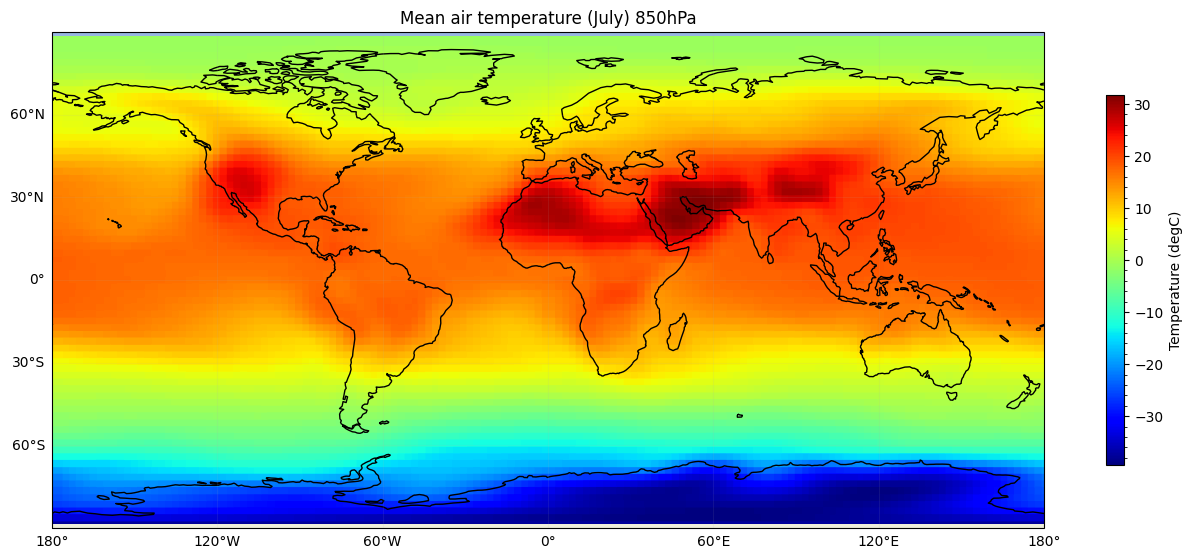

In [60]:
month = ['may', 'june', 'july']
level = ['1000','900','850']

# looping through each month and level and plotting the data for each month and level

for i in month:
    for j in level:
        clim_month = xr.open_dataset('../monsoon/datasets/air.'+i+'.nc')
        clim_month = clim_month.mean(dim='time')
        clim_month = clim_month.sel(level=j,method='nearest')
        clim_data, lon = add_cyclic_point(clim_month.air, coord=clim_month.lon)
        lat = clim_month.lat

        fig = plt.figure(figsize=(16,16))
        ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
        mp = ax.imshow(clim_data-273,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='jet',origin='upper')
        plt.title('Mean air temperature ('+i.capitalize()+')' + ' ' + j + 'hPa')
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.OCEAN)
        cbar = fig.colorbar(mp, shrink=0.3,label='Temperature (degC)')
        cbar.minorticks_on()
        gl = ax.gridlines(draw_labels=True,alpha=0.1)
        gl.top_labels = False
        gl.right_labels = False
        plt.savefig('../monsoon/figures/Mean air temperature ('+i+')'+ ' ' +j +'hPa.png')



Trying and seeing whether adding the cyclic points via interpolation works or not ?? 

Original shape - (94, 192)
New shape - (94, 193)


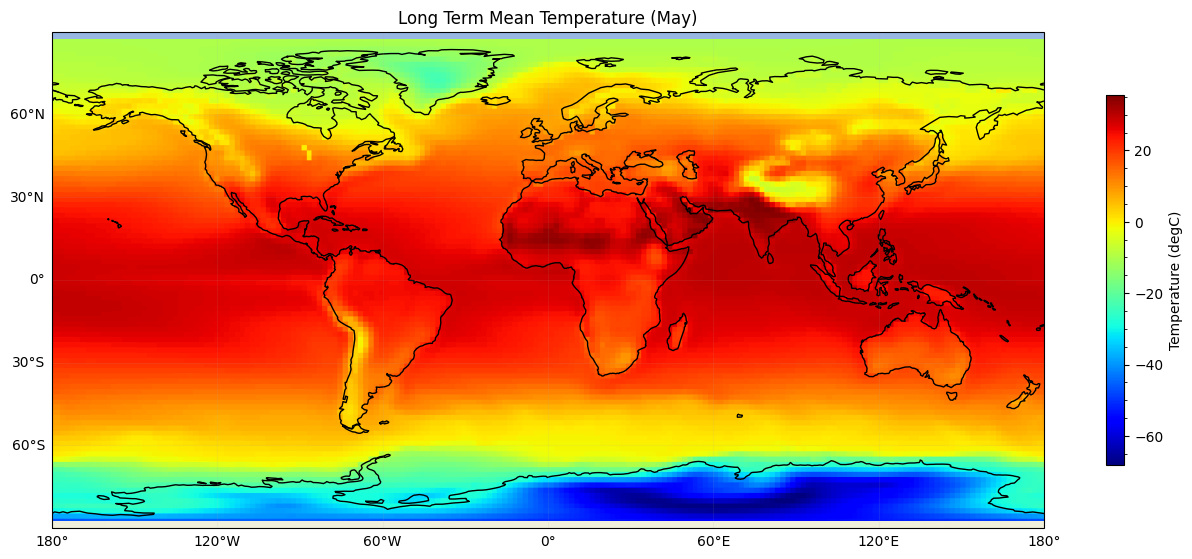

In [48]:
from cartopy.util import add_cyclic_point

may = xr.open_dataset('../monsoon/datasets/skt.may.nc')

# may = may.skt
clim_may = may.mean(dim='time')

## adding the cyclic points to remove the missing data at the center of the plot

data = clim_may['skt']
lon = clim_may.coords['lon']

print("Original shape -", data.shape)
lon_idx = data.dims.index('lon')
wrap_data, wrap_lon = add_cyclic_point(data.values, coord=lon, axis=lon_idx)
print("New shape -", wrap_data.shape)


# Plotting the data 

# lon = clim_may.lon
lat = clim_may.lat

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

mp = ax.imshow(wrap_data-273.5,extent=(wrap_lon.min(),wrap_lon.max(),lat.min(),lat.max()),cmap='jet',origin='upper')
plt.title('Long Term Mean Temperature (May)')
# plt.legend(['Temp'])

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
# ax.add_feature(cfeature.BORDERS,edgecolor='blue')
# ax.add_feature(states_provinces, edgecolor='blue')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Temperature (degC)')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False


